In [ ]:
https://github.com/selva86/datasets

# Conceptual
## 1. Describe the null hypotheses to which the p-values given in Table 3.4
correspond. Explain what conclusions you can draw based on these
p-values. Your explanation should be phrased in terms of sales, TV,
radio, and newspaper, rather than in terms of the coefficients of the
linear model.

````
            |Coefficient |Std. error| t-statistic| p-value|
Intercept     2.939       0.3119       9.42 < 0.0001
TV            0.046       0.0014       32.81 < 0.0001
radio         0.189       0.0086       21.89 < 0.0001
newspaper    −0.001       0.0059       −0.18 0.8599
````

__Answer__: Null hypothesis is that there is no relationship (they're just independent Gaussian vars) between investing more money and getting more units sold.
Investing additional $1k in radio yields 189 units sold on avaerga, similarly 46 units for tv. No significant relationship found for newspapers

## 2.Carefully explain the differences between the KNN classifier and KNN regression methods.

__Answer__: 
classifier's output is estimate of which class a data point belongs to(countable), regression is ought to predict a continuous value


## 3.GPA(b1=20),IQ(b2=0.07),Gender(b3=35),GPA*IQ(b4=0.01),GPA*Gender(b5=-10)
b0=50

(a) Which answer is correct, and why?

````
i. For a fixed value of IQ and GPA, males earn more on average
than females. --> not enough data, gimme GPA
````
 GPA*-10+35 vs 0
````
ii. For a fixed value of IQ and GPA, females earn more on
average than males. --> yes, gender is positive

iii. For a fixed value of IQ and GPA, males earn more on average
than females provided that the GPA is high enough. --> yes, GPA*Gender interaction term is negative, so GPA of 4.0 punishes the score compensating for +35 in gender
iv. For a fixed value of IQ and GPA, females earn more on
average than males provided that the GPA is high enough.--> no
````

(b) Predict the salary of a female(gender=1) with IQ of 110 and a GPA of 4.0
````
 50 + 20*4.0 + 0.07*110 + 35*1 + 4.0*110*0.01 + 4.0*1*-10 = 137.1
````

(c) True or false: Since the coefficient for the GPA/IQ interaction
term is very small, there is very little evidence of an interaction
effect. Justify your answer.
````
False. Small coefficient means small influence, although we can have quite a lot of data to draw the trend from. We should looks at P value when answering this question
````

## 4. I collect a set of data (n = 100 observations) 
containing a singlepredictor and a quantitative response. I then fit a linear regression
model to the data, as well as a separate cubic regression,

(a) Suppose that the true relationship between X and Y is linear,
i.e. Y = β0 + β1X + eps. Consider the training residual sum of
squares (RSS) for the linear regression, and also the training
RSS for the cubic regression. Would we expect one to be lower
than the other, would we expect them to be the same, or is there
not enough information to tell? Justify your answer.
````
training RSS for cubic will be smaller as more complex model is capable of capturing more variance.
````
(b) Answer (a) using test rather than training RSS.
````
here I expect linear model to outperfrom cubic one as the true form is linear, so cubic overfits
````
(c) Suppose that the true relationship between X and Y is not linear,
but we don’t know how far it is from linear. Consider the training
RSS for the linear regression, and also the training RSS for the
cubic regression. Would we expect one to be lower than the
other, would we expect them to be the same, or is there not
enough information to tell? Justify your answer.
````
Similarly to reasoning in (a) I think cubic RSS would be smaller.
````
(d) Answer (c) using test rather than training RSS.
````
Not enough information. If the data is essentially cubic or other non-linear then linear reg will work worse than cubic
````

## 5. TODO Consider the fitted values that result from performing linear regression
without an intercept. In this setting, the ith fitted value takes
the form
<img src="img/3_38.png" alt="Drawing" style="width: 200px;"/>

Show that we can write
<img src="img/135_5.png" alt="Drawing" style="width: 200px;"/>

Note: We interpret this result by saying that the fitted values from
linear regression are linear combinations of the response values.


## 6. TODO Using (3.4), argue that in the case of simple linear regression, the
least squares line always passes through the point (¯x, ¯y).
<img src="img/3_4.png" alt="Drawing" style="width: 400px;"/>

## 7. TODO It is claimed in the text that in the case of simple linear regression
of Y onto X, the R2 statistic (3.17) is equal to the square of the
correlation between X and Y (3.18). Prove that this is the case. For
simplicity, you may assume that ¯x = ¯y = 0.
<img src="img/3_18.png" alt="Drawing" style="width: 400px;"/>

# Applied

In [57]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
import numpy as np

In [27]:
auto = pd.read_csv("auto.csv", na_values='?')

In [28]:
auto.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu


In [35]:
auto = auto.dropna(how='any')

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(auto[['horsepower']], auto['mpg'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
(model.intercept_, model.coef_)

(39.935861021170474, array([-0.15784473]))

In [40]:
from sklearn.feature_selection import f_regression

In [44]:
F, pval = f_regression(auto[['horsepower']], auto['mpg'])
(F, pval)

(array([ 599.7177409]), array([  7.03198903e-81]))

In [48]:
from statsmodels.formula.api import ols
model = ols("mpg ~ horsepower", auto).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 23 Apr 2016   Prob (F-statistic):           7.03e-81
Time:                        15:22:20   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000        38.525    41.347
horsepower    -0.1578      0.006    -24.489      0.000        -0.171    -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================
"""

i. Is there a relationship between the predictor and the response?
````
Yes
````
ii. How strong is the relationship between the predictor and
the response?
````
it's negative linear with 15% slope
````
iii. Is the relationship between the predictor and the response
positive or negative?
````
negative
````
iv. What is the predicted mpg associated with a horsepower of
98? What are the associated 95% confidence and prediction
intervals?
````
Conf: [-0.171, -0.145]
Predcit: ?
````

(b) Plot the response and the predictor. Use the abline() function
to display the least squares regression line.

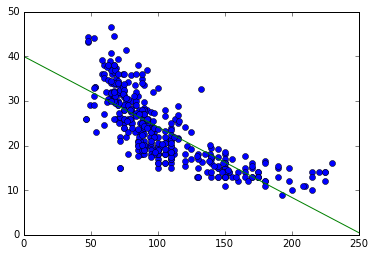

In [77]:
b0 = 39.9359
b1 = -0.1578
min_x = 0
max_x = 250
plt.plot(auto['horsepower'], auto['mpg'], "o",)
plt.plot([min_x,max_x],[b0+b1*min_x,b0+b1*max_x],"-")

(c) Use the plot() function to produce diagnostic plots of the least
squares regression fit. Comment on any problems you see with
the fit.

In [78]:
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(model)
test_class.dfbetas[:5,:]

array([[ 0.00406224, -0.0097067 ],
       [-0.01302365,  0.01810949],
       [-0.01380177,  0.02133499],
       [ 0.00205427, -0.00317552],
       [ 0.00451784, -0.00799836]])

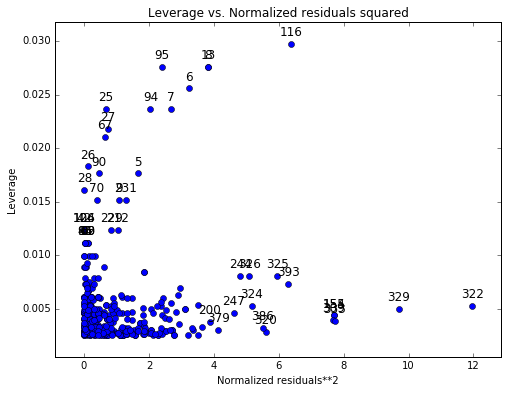

In [79]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(model, ax = ax)

![title](img/R_plot.png)

# 9. This question involves the use of multiple linear regression on the Auto data set.

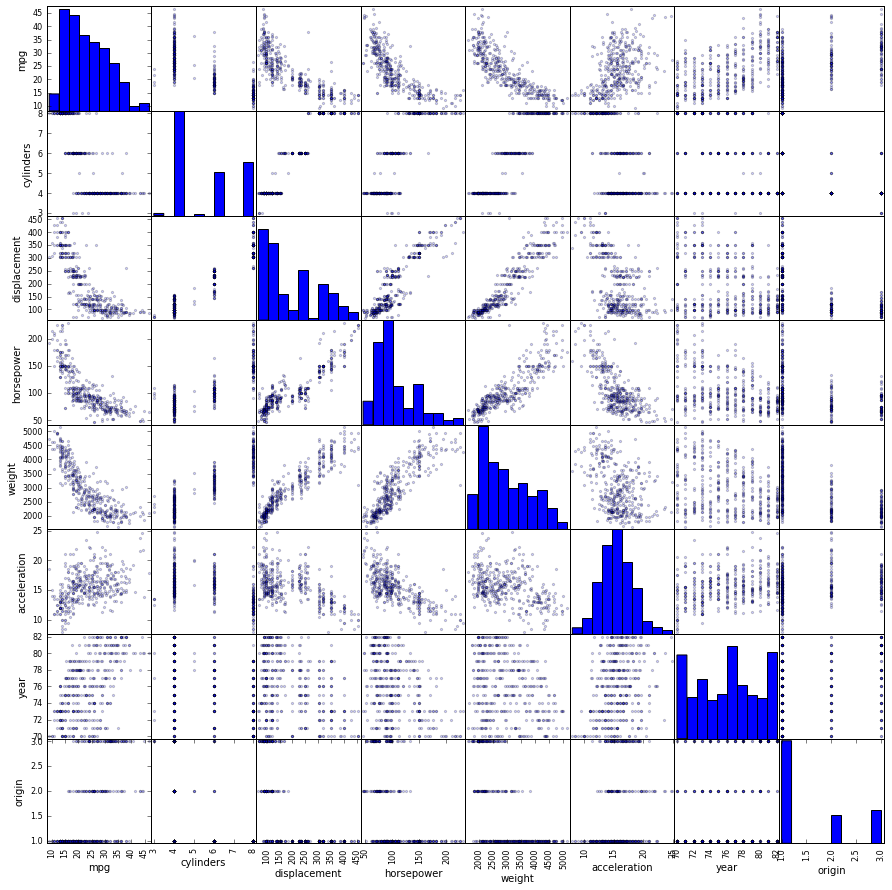

In [83]:
axes = pd.tools.plotting.scatter_matrix(auto, alpha=0.2)
fig = plt.gcf()
fig.set_size_inches(15, 15)

In [85]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [88]:
model = ols("mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin", auto).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 23 Apr 2016   Prob (F-statistic):          2.04e-139
Time:                        16:08:00   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000       -26.350    -8.087
cylinders       -0.4934      0.323     -1.526      0.128        -1.129     0.142
displacement     0.0199      0.008      2.647      0.008         0.005     0.035
horsepower      -0.0170      0.014     -1.230      0.220        -0.044     0.010
weight          -0.0065      0.001     -9.929      0.000        -0.008    -0.005
acceleration     0.0806      0.099      0.815      0.415        -0.114     0.275
year             0.7508      0.051     14.729      0.000         0.651     0.851
origin           1.4261      0.278      5.127      0.000         0.879     1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

i. Is there a relationship between the predictors and the response?
````
yeah
````
ii. Which predictors appear to have a statistically significant
relationship to the response?
````
weight, year, oriign and displacement
````
iii. What does the coefficient for the year variable suggest?
````
0.75
````

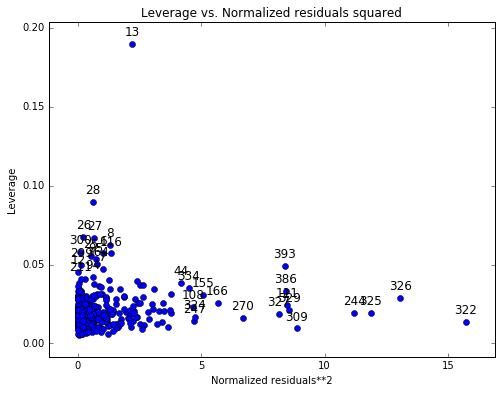

In [89]:
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(model, ax = ax)

(d) Use the plot() function to produce diagnostic plots of the linear
regression fit. Comment on any problems you see with the fit.
Do the residual plots suggest any unusually large outliers? Does
the leverage plot identify any observations with unusually high
leverage?
````
13th is an outlier
````

In [92]:
model = ols("mpg ~ cylinders + displacement + cylinders*displacement + horsepower + weight + horsepower:weight + acceleration + year + origin", auto).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     267.4
Date:                Sat, 23 Apr 2016   Prob (F-statistic):          6.52e-159
Time:                        16:12:16   Log-Likelihood:                -971.56
No. Observations:                 392   AIC:                             1963.
Df Residuals:                     382   BIC:                             2003.
Df Model:                           9                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  4.0528      4.544      0.892      0.373        -4.881    12.986
cylinders                 -0.7357      0.483     -1.522      0.129        -1.686     0.215
displacement              -0.0201      0.016     -1.269      0.205        -0.051     0.011
cylinders:displacement     0.0039      0.002      1.816      0.070        -0.000     0.008
horsepower                -0.2080      0.027     -7.754      0.000        -0.261    -0.155
weight                    -0.0101      0.001    -10.849      0.000        -0.012    -0.008
horsepower:weight       4.699e-05   6.93e-06      6.781      0.000      3.34e-05  6.06e-05
acceleration              -0.0706      0.089     -0.793      0.428        -0.245     0.104
year                       0.7692      0.045     17.168      0.000         0.681     0.857
origin                     0.7159      0.259      2.765      0.006         0.207     1.225
==============================================================================
Omnibus:                       41.771   Durbin-Watson:                   1.489
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.626
Skew:                           0.609   Prob(JB):                     1.88e-18
Kurtosis:                       4.875   Cond. No.                     1.24e+07
==============================================================================

Warnings:
[1] The condition number is large, 1.24e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Do any interactions appear to be statistically
significant?
````
yes, but their effects are negligible
````

(f) Try a few different transformations of the variables, such as
log(X),
√
X, X2. Comment on your findings.
````
P vals change. E.g. when we squared the data, the vals got closer to everything but horsepower
````

In [102]:
auto_3 = auto.dropna()
for col in ['cylinders', 'displacement','horsepower','weight','acceleration','year','origin']:
    auto_3[col] = auto_3[col]**2
model = ols("mpg ~ cylinders + displacement + horsepower + weight +acceleration + year + origin", auto_3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     216.8
Date:                Sat, 23 Apr 2016   Prob (F-statistic):          3.57e-129
Time:                        16:18:51   Log-Likelihood:                -1047.6
No. Observations:                 392   AIC:                             2111.
Df Residuals:                     384   BIC:                             2143.
Df Model:                           7                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        1.2080      2.356      0.513      0.608        -3.424     5.840
cylinders       -0.0883      0.025     -3.502      0.001        -0.138    -0.039
displacement   5.68e-05   1.38e-05      4.109      0.000      2.96e-05   8.4e-05
horsepower   -3.621e-05   4.98e-05     -0.728      0.467        -0.000  6.16e-05
weight       -9.351e-07   8.98e-08    -10.416      0.000     -1.11e-06 -7.59e-07
acceleration     0.0063      0.003      2.334      0.020         0.001     0.012
year             0.0050      0.000     14.160      0.000         0.004     0.006
origin           0.4129      0.069      5.971      0.000         0.277     0.549
==============================================================================
Omnibus:                       21.204   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.337
Skew:                           0.431   Prob(JB):                     4.26e-07
Kurtosis:                       4.027   Cond. No.                     1.45e+08
==============================================================================

Warnings:
[1] The condition number is large, 1.45e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 10. This question should be answered using the Carseats data set

In [104]:
seats = pd.read_csv("carseats.csv")
seats.head(1)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.5,138,73,11,276,120,Bad,42,17,Yes,Yes


In [108]:
model = ols("Sales ~ Price + Urban + US", seats).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sat, 23 Apr 2016   Prob (F-statistic):           2.39e-23
Time:                        19:06:05   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000        11.764    14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936        -0.556     0.512
US[T.Yes]        1.2006      0.259      4.635      0.000         0.691     1.710
Price           -0.0545      0.005    -10.389      0.000        -0.065    -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================
"""

(b) Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!
````
On average sales are 13.04.
Decreasing price by $1 means 5% increase in sales.
US products sale 20% better than otherwise
There's no significant correlation for Urban
````

(c) Write out the model in equation form, being careful to handle
the qualitative variables properly.
````
non_us_sales = 13.04 - 0.05 * price
us_sales = non_us_sales*1.2
````

(d) For which of the predictors can you reject the null hypothesis
H0 : βj = 0?
````
US & Price
````

(e) On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.

In [109]:
model = ols("Sales ~ Price + US", seats).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sat, 23 Apr 2016   Prob (F-statistic):           2.66e-24
Time:                        19:10:36   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000        11.790    14.271
US[T.Yes]      1.1996      0.258      4.641      0.000         0.692     1.708
Price         -0.0545      0.005    -10.416      0.000        -0.065    -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================
"""

(f) How well do the models in (a) and (e) fit the data?
````
R^2 is 0.239 in both cases so similarly
````
(g) Using the model from (e), obtain 95% confidence intervals for
the coefficient(s).
````
b0 = (11.790, 14.271)
b1(US) = (0.692, 1.708)
b2(Price) = (-0.065, -0.044)
````
(h) Is there evidence of outliers or high leverage observations in the
model from (e)?
````
yeah, we have a few
````

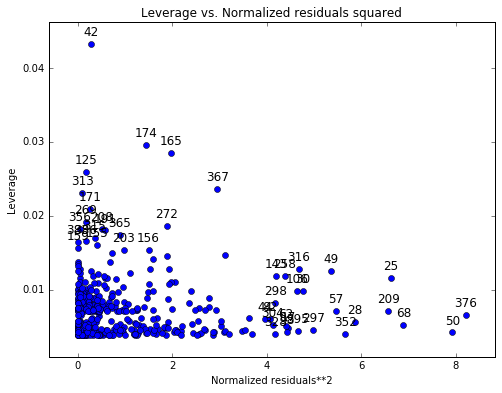

In [111]:
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(model, ax = ax)

# 11. In this problem we will investigate the t-statistic for the null hypothesis
H0 : β = 0 in simple linear regression without an intercept. To
begin, we generate a predictor x and a response y as follows.

In [112]:
np.random.seed(1)

In [115]:
x = np.random.normal(size=100)
y = 2*x + np.random.normal(size=100)

(a) Perform a simple linear regression of y onto x, without an intercept.
Report the coefficient estimate ˆβ, the standard error of
this coefficient estimate, and the t-statistic and p-value associated
with the null hypothesis H0 : β = 0. Comment on these
results. (You can perform regression without an intercept using
the command lm(y∼x+0).)

In [131]:
model = ols("y ~ x + 0", pd.DataFrame({'y':y, 'x':x})).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     419.6
Date:                Sat, 23 Apr 2016   Prob (F-statistic):           2.22e-37
Time:                        19:26:00   Log-Likelihood:                -142.69
No. Observations:                 100   AIC:                             287.4
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x              2.1979      0.107     20.485      0.000         1.985     2.411
==============================================================================
Omnibus:                        0.026   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.030
Skew:                           0.017   Prob(JB):                        0.985
Kurtosis:                       2.922   Cond. No.                         1.00
==============================================================================
"""

````
Coef is close to 2 which is cool and is quite within confidence interval.
It can be closer on other realizations of the model - it's random and it will be 2 on average, remember
````
(b) Now perform a simple linear regression of x onto y without an
intercept, and report the coefficient estimate, its standard error,
and the corresponding t-statistic and p-values associated with
the null hypothesis H0 : β = 0. Comment on these results

In [132]:
model = ols("x ~ y + 0", pd.DataFrame({'y':y, 'x':x})).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     419.6
Date:                Sat, 23 Apr 2016   Prob (F-statistic):           2.22e-37
Time:                        19:27:59   Log-Likelihood:                -53.351
No. Observations:                 100   AIC:                             108.7
Df Residuals:                      99   BIC:                             111.3
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
y              0.3681      0.018     20.485      0.000         0.332     0.404
==============================================================================
Omnibus:                        0.940   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.625   Jarque-Bera (JB):                0.843
Skew:                           0.222   Prob(JB):                        0.656
Kurtosis:                       2.930   Cond. No.                         1.00
==============================================================================
"""

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

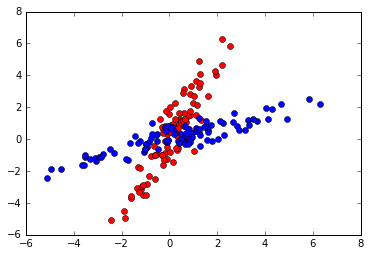

In [141]:
plt.plot(x,y,'o',color='red')
plt.plot(y,x,'o')

(b) Now perform a simple linear regression of x onto y without an
intercept, and report the coefficient estimate, its standard error,
and the corresponding t-statistic and p-values associated with
the null hypothesis H0 : β = 0. Comment on these results

````
Frankly I'd expect coefficient to be reverse of what we had with previous exercise.
In hindsight, y is more widely spread out for whatever reasons thus the current realization has much more influence when estimating slope.
````

In [142]:
pd.DataFrame({'y':y, 'x':x}).describe()

,x,y
count,100.000000,100.000000
mean,0.153257,0.341003
std,0.936402,2.293374
min,-2.434838,-5.100515
25%,-0.300010,-0.965846
50%,0.236616,0.511578
75%,0.743020,1.548005
max,2.528326,6.311488


(c) What is the relationship between the results obtained in (a) and
(b)?

````
On average slopes should be inverse, models will explain the same amount of variance.
````

11(d) TODO For the regression of Y onto X without an intercept, the tstatistic
for H0 : β = 0 takes the form ˆβ/SE( ˆ β), where ˆ β is
given by (3.38), and where
![title](img/124_1.png) (These formulas are slightly different from those given in Sections
3.1.1 and 3.1.2, since here we are performing regression
without an intercept.) Show algebraically, and confirm numerically
in R, that the t-statistic can be written as ![title](img/125_1.png)

11.e) TODO Using the results from (d), argue that the t-statistic for the regression
of y onto x is the same as the t-statistic for the regression
of x onto y.

(f) In R, show that when regression is performed with an intercept,
the t-statistic for H0 : β1 = 0 is the same for the regression of y
onto x as it is for the regression of x onto y.

In [148]:
model = ols("x ~ y", pd.DataFrame({'y':y, 'x':x})).fit()
model.fvalue

404.19234635927705

In [149]:
model = ols("y ~ x", pd.DataFrame({'y':y, 'x':x})).fit()
model.fvalue

404.19234635927705

# 12. This problem involves simple linear regression without an interceptm

(a)  Recall that the coefficient estimate ˆ β for the linear regression of
Y onto X without an intercept is given by (3.38). Under what
circumstance is the coefficient estimate for the regression of X
onto Y the same as the coefficient estimate for the regression of
Y onto X?

![title](img/3_38.png)

````
beta_y_x = x*y/(x-x0)**2
beta_x_y = x*y/(y-y0)**2
beta_y_x = beta_x_y --> (y-y0)**2 = (x-y0)**2
````

(b) Generate an example in R with n = 100 observations in which
the coefficient estimate for the regrmession of X onto Y is different
from the coefficient estimate for the regression of Y onto X.

In [204]:
np.random.seed(0)
x = np.random.normal(scale=2, size=100)
y = np.random.normal(size=100)
model = ols("y ~ x + 0", pd.DataFrame({'y':y, 'x':x})).fit()
model.params

x    0.059554
dtype: float64

In [205]:
model = ols("x ~ y + 0", pd.DataFrame({'y':y, 'x':x})).fit()
model.params

y    0.225421
dtype: float64

(c) Generate an example in R with n = 100 observations in which
the coefficient estimate for the regression of X onto Y is the
same as the coefficient estimate for the regression of Y onto X.

In [208]:
np.random.seed(0)
x = np.random.normal(size=100)
y = np.random.normal(size=100)
model = ols("y ~ x + 0", pd.DataFrame({'y':y, 'x':x})).fit()
model.params

x    0.119108
dtype: float64

In [209]:
model = ols("x ~ y + 0", pd.DataFrame({'y':y, 'x':x})).fit()
model.params

y    0.112711
dtype: float64

# 13. In this exercise you will create some simulated data and will fit simple
linear regression models to it

(a) Using the rnorm() function, create a vector, x, containing 100
observations drawn from a N(0, 1) distribution. This represents
a feature, X.

In [271]:
np.random.seed(1)
var_param = 5
X = np.random.normal(size=100)

(b) Using the rnorm() function, create a vector, eps, containing 100
observations drawn from a N(0, 0.25) distribution i.e. a normal
distribution with mean zero and variance 0.25.

In [272]:
eps = np.random.normal(size=100, scale=0.25*var_param)

(c) Using x and eps, generate a vector y according to the model

In [273]:
Y = -1 + 0.5*X + eps

What is the length of the vector y? What are the values of β0
and β1 in this linear model?
````
100, -1, 0.5
````

(d) Create a scatterplot displaying the relationship between x and
y. Comment on what you observe.
````
slope is obviously 0.5
average y around -1
````

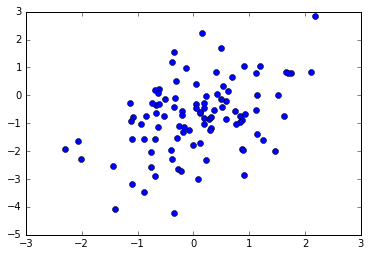

In [274]:
plt.plot(X,Y,'o')

(e) Fit a least squares linear model to predict y using x. Comment
on the model obtained. How do ˆ β0 and ˆ β1 compare to β0 and
β1?
````
True values are within confidence intervals
````

In [277]:
model = ols("Y ~ X", pd.DataFrame({'Y':Y, 'X': X})).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     21.88
Date:                Sat, 23 Apr 2016   Prob (F-statistic):           9.31e-06
Time:                        20:09:27   Log-Likelihood:                -156.75
No. Observations:                 100   AIC:                             317.5
Df Residuals:                      98   BIC:                             322.7
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.8162      0.117     -6.948      0.000        -1.049    -0.583
X              0.6193      0.132      4.677      0.000         0.357     0.882
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================
"""

(f) Display the least squares line on the scatterplot obtained in (d).
Draw the population regression line on the plot, in a different
color. Use the legend() command to create an appropriate legend.

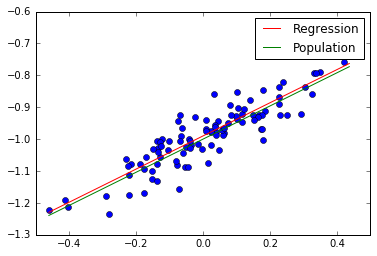

In [247]:
intercept = -0.99
slope=0.52
true_slope=0.5
true_intercept=-1
plt.plot(X,Y,'o')
x_min=X.min()
x_max=X.max()
line1, = plt.plot([x_min, x_max],[intercept+slope*x_min, intercept + slope*x_max], 'red')
line2, = plt.plot([x_min, x_max],[true_intercept+slope*x_min, true_intercept + slope*x_max], 'green')
plt.legend([line1, line2], ['Regression','Population'])

(g) Now fit a polynomial regression model that predicts y using x
and x2. Is there evidence that the quadratic term improves the
model fit? Explain your answer.
````
No, it does not. R^2 is the same, P value towards X2 says no evidence
````

In [248]:
model = ols("Y ~ X+X2", pd.DataFrame({'Y':Y, 'X': X, 'X2':X**2})).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Sat, 23 Apr 2016   Prob (F-statistic):           1.32e-34
Time:                        20:03:56   Log-Likelihood:                 165.15
No. Observations:                 100   AIC:                            -324.3
Df Residuals:                      97   BIC:                            -316.5
Df Model:                           2                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.9933      0.006   -172.106      0.000        -1.005    -0.982
X              0.5234      0.027     19.582      0.000         0.470     0.576
X2             0.0193      0.106      0.181      0.856        -0.192     0.230
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         22.6
==============================================================================
"""

(i) Repeat (a)–(f) after modifying the data generation process in
such a way that there is more noise in the data. The model
(3.39) should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the
error term  in (b). Describe your results.

````
Intercept coefficient is much closer to the expected vals (-0.99 vs -0.96)
Slope is roughly the same - we actually need more variance to estimate this better
````

(j) What are the confidence intervals for β0 and β1 based on the
original data set, the noisier data set, and the less noisy data
set? Comment on your results.
````
More noize obviously yields wider intervals
normal: -1.010 -0.917. 0.471 0.576
1/5:    -1.010 -0.917  0.471 0.576
5x:     -1.049 -0.583  0.357 0.882
````

# 14. This problem focuses on the collinearity problem.

In [289]:
np.random.seed(10)
x1 = np.random.uniform(size=100)
x2 = 0.5 *x1 + np.random.normal(100)/10
y= 2+2* x1 +0.3* x2+np.random.normal(100)
data = pd.DataFrame({'x1':x1, 'y':y, 'x2':x2})

In [286]:
data.corr()

,x1,x2,y
x1,1.0,1.0,1.0
x2,1.0,1.0,1.0
y,1.0,1.0,1.0


(b) What is the correlation between x1 and x2? Create a scatterplot
displaying the relationship between the variables.

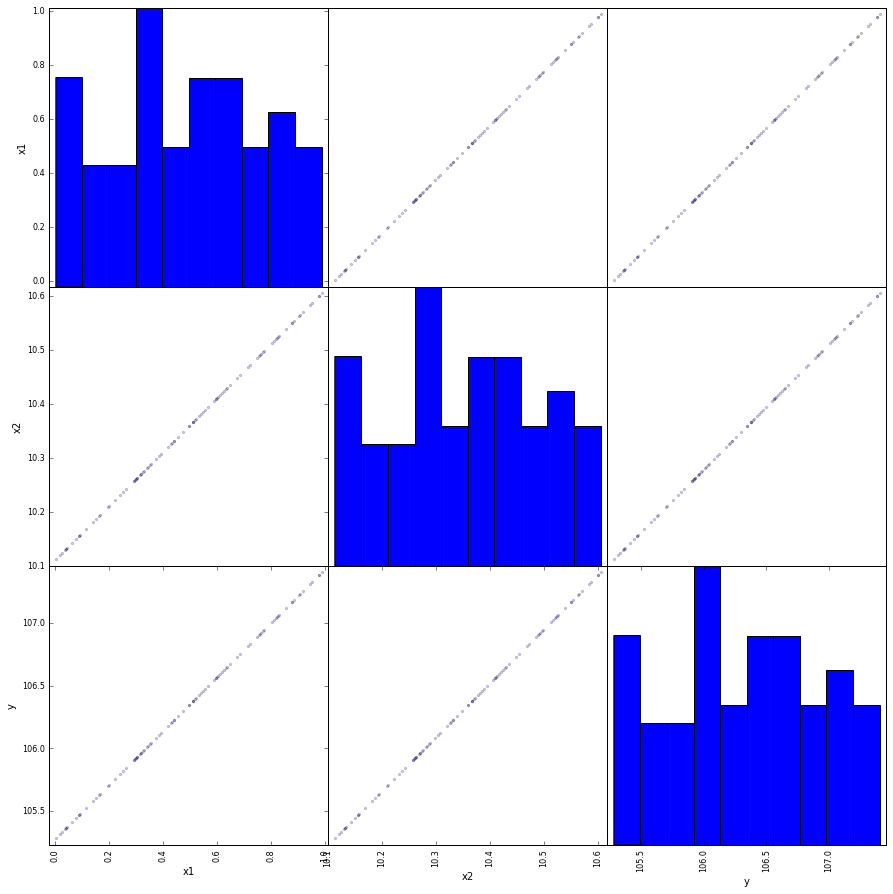

In [288]:
axes = pd.tools.plotting.scatter_matrix(data, alpha=0.2)
fig = plt.gcf()
fig.set_size_inches(15, 15)

In [290]:
model = ols("y ~ x1 + x2", data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.218e+28
Date:                Sat, 23 Apr 2016   Prob (F-statistic):               0.00
Time:                        20:21:13   Log-Likelihood:                 3016.1
No. Observations:                 100   AIC:                            -6028.
Df Residuals:                      98   BIC:                            -6023.
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.1667   3.88e-16   3.01e+15      0.000         1.167     1.167
x1            -2.9985   7.23e-15  -4.15e+14      0.000        -2.999    -2.999
x2            10.2970   3.57e-16   2.89e+16      0.000        10.297    10.297
==============================================================================
Omnibus:                        3.681   Durbin-Watson:                   0.560
Prob(Omnibus):                  0.159   Jarque-Bera (JB):                2.392
Skew:                           0.180   Prob(JB):                        0.302
Kurtosis:                       2.333   Cond. No.                     6.75e+08
==============================================================================

Warnings:
[1] The smallest eigenvalue is 2.38e-14. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

(c) Using this data, fit a least squares regression to predict y using
x1 and x2. Describe the results obtained. What are ˆ β0, ˆ β1, and
ˆ β2? How do these relate to the true β0, β1, and β2? Can you
reject the null hypothesis H0 : β1 = 0? How about the null
hypothesis H0 : β2 = 0?
````
P vals kinda say that the coefficients are not 0, but values largely differ from the true ones
````

(d) Now fit a least squares regression to predict y using only x1.
Comment on your results. Can you reject the null hypothesis
H0 : β1 = 0?
````
Yes
````

In [293]:
model = ols("y ~ x1", data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.214e+28
Date:                Sat, 23 Apr 2016   Prob (F-statistic):               0.00
Time:                        20:23:32   Log-Likelihood:                 2914.7
No. Observations:                 100   AIC:                            -5825.
Df Residuals:                      98   BIC:                            -5820.
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    105.2778   1.09e-14   9.67e+15      0.000       105.278   105.278
x1             2.1500   1.95e-14    1.1e+14      0.000         2.150     2.150
==============================================================================
Omnibus:                       38.422   Durbin-Watson:                   0.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.725
Skew:                           0.926   Prob(JB):                     5.21e-05
Kurtosis:                       1.857   Cond. No.                         4.55
==============================================================================
"""

In [294]:
model = ols("y ~ x2", data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.698e+28
Date:                Sat, 23 Apr 2016   Prob (F-statistic):               0.00
Time:                        20:27:35   Log-Likelihood:                 3013.2
No. Observations:                 100   AIC:                            -6022.
Df Residuals:                      98   BIC:                            -6017.
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     61.8015   1.51e-13   4.09e+14      0.000        61.801    61.801
x2             4.3000   1.46e-14   2.95e+14      0.000         4.300     4.300
==============================================================================
Omnibus:                        3.442   Durbin-Watson:                   0.415
Prob(Omnibus):                  0.179   Jarque-Bera (JB):                2.520
Skew:                           0.233   Prob(JB):                        0.284
Kurtosis:                       2.378   Cond. No.                         787.
==============================================================================
"""

(f) Do the results obtained in (c)–(e) contradict each other? Explain
your answer.
````
That's how x1/x2 regression would look like with another value being ignored. Multiple regression has coefficients somewhat by chance.
````

(g) Now suppose we obtain one additional observation, which was
unfortunately mismeasured.

In [300]:
x1 = np.append(x1, 0.1)
x2 = np.append(x2, 0.8)
y = np.append(y, 6)
data = pd.DataFrame({'x1':x1, 'y':y, 'x2':x2})
data.corr()

,x1,x2,y
x1,1.000000,0.291876,0.233651
x2,0.291876,1.000000,0.998179
y,0.233651,0.998179,1.000000


In [301]:
model = ols("y ~ x1 + x2", data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.752e+30
Date:                Sat, 23 Apr 2016   Prob (F-statistic):               0.00
Time:                        20:31:14   Log-Likelihood:                 2978.0
No. Observations:                 102   AIC:                            -5950.
Df Residuals:                      99   BIC:                            -5942.
Df Model:                           2                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.1865   3.92e-14  -5.57e+13      0.000        -2.187    -2.187
x1            -3.1643   1.92e-14  -1.65e+14      0.000        -3.164    -3.164
x2            10.6287   3.99e-15   2.66e+15      0.000        10.629    10.629
==============================================================================
Omnibus:                       41.955   Durbin-Watson:                   0.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.976
Skew:                          -1.430   Prob(JB):                     7.28e-28
Kurtosis:                       7.607   Cond. No.                         80.0
==============================================================================
"""

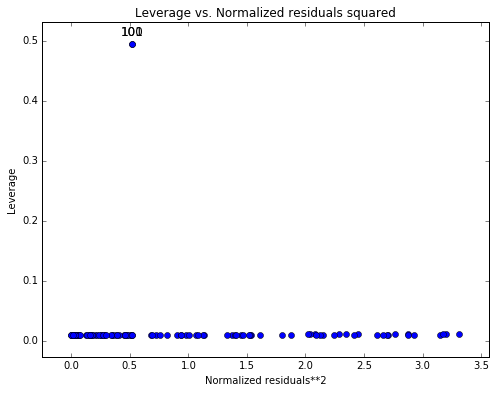

In [305]:
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(model, ax = ax)

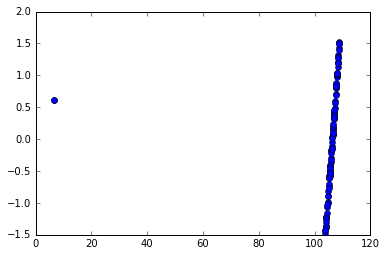

In [321]:
fitted = model.predict()
residuals = fitted - y
plt.plot(fitted, residuals,'o')

In [302]:
model = ols("y ~ x1", data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     5.775
Date:                Sat, 23 Apr 2016   Prob (F-statistic):             0.0181
Time:                        20:31:21   Log-Likelihood:                -410.48
No. Observations:                 102   AIC:                             825.0
Df Residuals:                     100   BIC:                             830.2
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     98.7527      2.696     36.636      0.000        93.405   104.101
x1            11.7236      4.879      2.403      0.018         2.044    21.403
==============================================================================
Omnibus:                      169.002   Durbin-Watson:                   0.569
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8387.239
Skew:                          -6.533   Prob(JB):                         0.00
Kurtosis:                      45.459   Cond. No.                         4.48
==============================================================================
"""

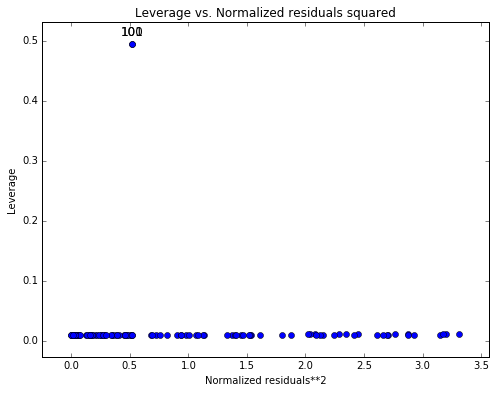

In [306]:
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(model, ax = ax)

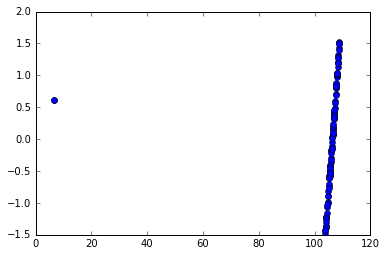

In [320]:
fitted = model.predict()
residuals = fitted - y
plt.plot(fitted, residuals,'o')

In [310]:
model = ols("y ~ x2", data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.738e+04
Date:                Sat, 23 Apr 2016   Prob (F-statistic):          8.86e-124
Time:                        20:35:10   Log-Likelihood:                -126.92
No. Observations:                 102   AIC:                             257.8
Df Residuals:                     100   BIC:                             263.1
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.7419      0.647     -2.694      0.008        -3.025    -0.459
x2            10.4362      0.063    165.482      0.000        10.311    10.561
==============================================================================
Omnibus:                       16.538   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.541
Skew:                          -0.006   Prob(JB):                        0.103
Kurtosis:                       1.966   Cond. No.                         79.7
==============================================================================
"""

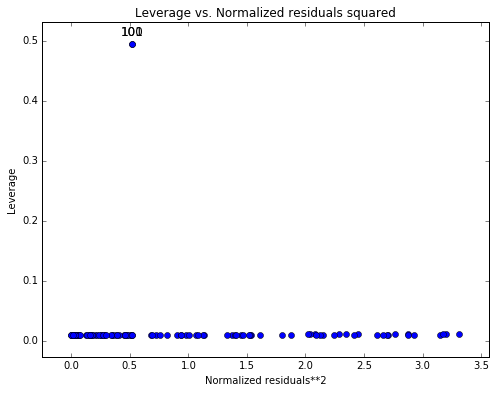

In [311]:
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(model, ax = ax)

Re-fit the linear models from (c) to (e) using this new data. What
effect does this new observation have on the each of the models?
In each model, is this observation an outlier? A high-leverage
point? Both? Explain your answers.
````
It's high in terms of leverage.
It stands out in plotting /residuals so is an outlier
````

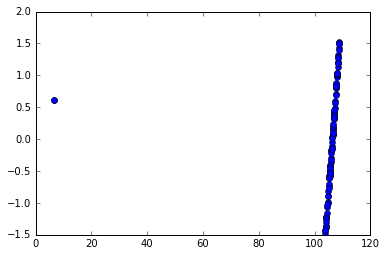

In [327]:
fitted = model.predict()
residuals = fitted - y
plt.plot(fitted, residuals,'o')

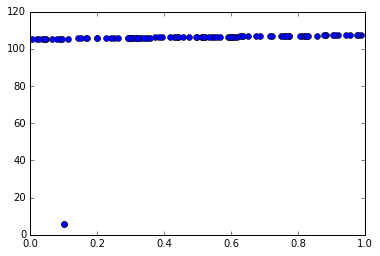

In [328]:
plt.plot(x1,y,'o')

# 15. This problem involves the Boston data set, which we saw in the lab
for this chapter.

In [329]:
data = pd.read_csv("BostonHousing.csv")
data.head(1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0


In [343]:
predictors = data.columns.values[1:]
predictors

array(['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'], dtype=object)

In [376]:
all_singlereg_coefficients = {}
selected_predictors = {}
for predictor in predictors:
    model = OLS(data['crim'], data[predictor]).fit()
    all_singlereg_coefficients[predictor] = model.params[predictor]
    if (model.rsquared <= 0.2):
        print predictor + ": [ignored] R^2=" + str(model.rsquared)
    else:
        selected_predictors[predictor] = model.rsquared
        print predictor + ": R^2=" + str(model.rsquared)
        print '######'
        s = model.summary()
        print s

zn: [ignored] R^2=1.46932889528e-05
indus: R^2=0.277270212616
######
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     193.7
Date:                Sat, 23 Apr 2016   Prob (F-statistic):           1.65e-37
Time:                        21:55:59   Log-Likelihood:                -1765.4
No. Observations:                 506   AIC:                             3533.
Df Residuals:                     505   BIC:                             3537.
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
indus          0.3754      0.027     13.919      0.000        

In [359]:
selected_predictors

{'age': 0.23234459836783639,
 'indus': 0.2772702126158505,
 'lstat': 0.29587036905322095,
 'nox': 0.21044283483946369,
 'rad': 0.45542971866712056,
 'tax': 0.31716951943331151}

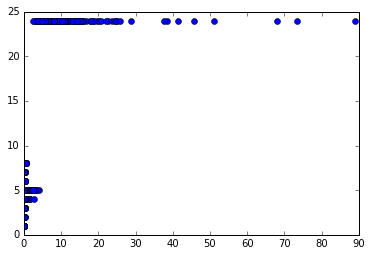

In [362]:
plt.plot(data['crim'], data['rad'],'o')

In [388]:
model = ols("crim ~ " + " + ".join(predictors.tolist()), data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Sat, 23 Apr 2016   Prob (F-statistic):           1.57e-56
Time:                        21:58:39   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.019         2.818    31.248
zn             0.0449      0.019      2.394      0.017         0.008     0.082
indus         -0.0639      0.083     -0.766      0.444        -0.228     0.100
chas          -0.7491      1.180     -0.635      0.526        -3.068     1.570
nox          -10.3135      5.276     -1.955      0.051       -20.679     0.052
rm             0.4301      0.613      0.702      0.483        -0.774     1.634
age            0.0015      0.018      0.081      0.935        -0.034     0.037
dis           -0.9872      0.282     -3.503      0.001        -1.541    -0.433
rad            0.5882      0.088      6.680      0.000         0.415     0.761
tax           -0.0038      0.005     -0.733      0.464        -0.014     0.006
ptratio       -0.2711      0.186     -1.454      0.147        -0.637     0.095
b             -0.0075      0.004     -2.052      0.041        -0.015    -0.000
lstat          0.1262      0.076      1.667      0.096        -0.023     0.275
medv          -0.1989      0.061     -3.287      0.001        -0.318    -0.080
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(b) Fit a multiple regression model to predict the response using
all of the predictors. Describe your results. For which predictors
can we reject the null hypothesis H0 : βj = 0?
````
rad (p=0.000)
dis (p=0.001)
mdev(p=0.001)
````

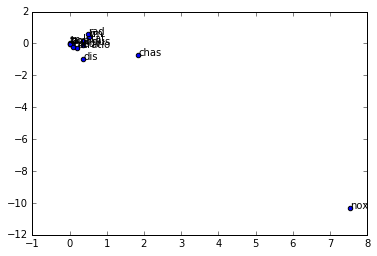

In [401]:
x = []
y = []
for predictor in predictors:
    single_val = all_singlereg_coefficients[predictor]
    multi_val = model.params[predictor]
    x.append(single_val)
    y.append(multi_val)
fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(predictors):
   ax.annotate(txt, (x[i],y[i]))

Is there evidence of non-linear association between any of the
predictors and the response?

In [404]:
selected_predictors = {}
for predictor in predictors:
    x = data[predictor]
    df = pd.DataFrame({'x':x, 'y': data['crim'], 'x2':x**2, 'x3': x**3})
    model = ols("y ~ x + x2 + x3", df).fit()
    if (model.rsquared <= 0.2):
        print predictor + ": [ignored] R^2=" + str(model.rsquared)
    else:
        selected_predictors[predictor] = model.rsquared
        print predictor + ": R^2=" + str(model.rsquared)
        print '######'
        s = model.summary()
        print s

zn: [ignored] R^2=0.0582419742226
indus: R^2=0.25965785792
######
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     58.69
Date:                Sat, 23 Apr 2016   Prob (F-statistic):           1.55e-32
Time:                        22:04:27   Log-Likelihood:                -1730.3
No. Observations:                 506   AIC:                             3469.
Df Residuals:                     502   BIC:                             3486.
Df Model:                           3                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.6626      1.574      2.327      0.020         0.

In [405]:
selected_predictors

{'dis': 0.27782477308673659,
 'indus': 0.25965785791956641,
 'lstat': 0.21793243242225613,
 'medv': 0.42020025656341531,
 'nox': 0.29697789562873889,
 'rad': 0.40003687202422344,
 'tax': 0.36888207966295983}

Compare the difference with linears for yourself:
````
{'age': 0.23234459836783639,
 'indus': 0.2772702126158505,
 'lstat': 0.29587036905322095,
 'nox': 0.21044283483946369,
 'rad': 0.45542971866712056,
 'tax': 0.31716951943331151}
````